In [78]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [79]:
import numpy as np
import pandas as pd
# for reasons beyond my knowledge those two date times are different 

#this handles regular date time functions 
import datetime as dt

#This handles convertions of strings to date time format 
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [80]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [81]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [82]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with = engine)

# reflect the tables
measure = Base.classes.measurement
station = Base.classes.station

In [83]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [84]:
# Save references to each table


In [85]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [86]:
# Find the most recent date in the data set.
recent = session.query(measure.date).order_by(measure.date.desc()).first()
recent


('2017-08-23',)

In [87]:
# changes the string in the most recent date to date time format

format = '%Y-%m-%d'
recent_date = datetime.strptime(recent[0], format)
recent_date

datetime.datetime(2017, 8, 23, 0, 0)

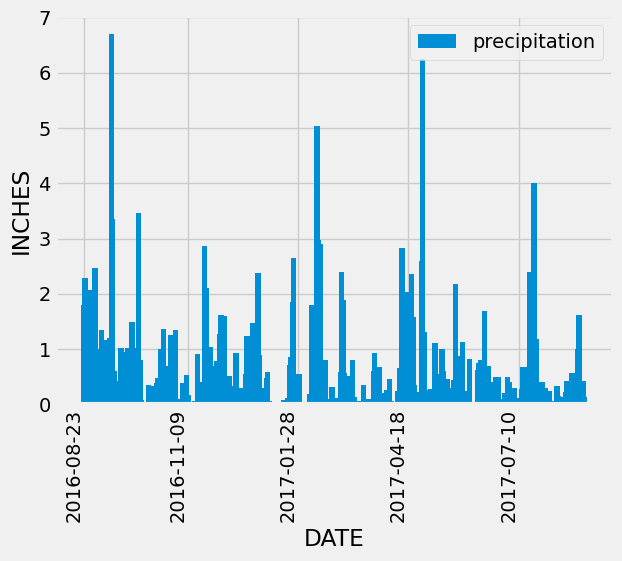

In [88]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.

# This check 365 days back (1 year)
# also recent_date was already in date format 

query_date = recent_date - dt.timedelta(days=366)

# Perform a query to retrieve the data and precipitation scores

prcp_data = session.query(measure.date, measure.prcp).filter(measure.date >= query_date)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df_prcp = pd.DataFrame(prcp_data).dropna()

# Sort the dataframe by date
df_prcp.sort_values("date")
df_prcp
# Use Pandas Plotting with Matplotlib to plot the data

x = df_prcp["date"]
y = df_prcp["prcp"]

plt.bar(x,y, width = 4, label = 'precipitation')
plt.xlabel("DATE")
plt.ylabel("INCHES")
plt.xticks(['2016-08-23', '2016-11-09', '2017-01-28', '2017-04-18', '2017-07-10'])
plt.xticks(rotation=90, ha='right')
plt.legend(loc = 'best')
plt.show()

In [89]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_prcp.describe()


,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [90]:
# Design a query to calculate the total number of stations in the dataset

station_num = session.query(station.station).count()
station_num

9

In [91]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

station_act = session.query(measure.station, func.count(measure.station)).group_by(measure.station).order_by(func.count(measure.station).desc()).all()

# Most active station
most_act = station_act[0][0]

station_act

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [101]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

station_temp = session.query(func.min(measure.tobs), func.max(measure.tobs), func.avg(measure.tobs)).filter(measure.station == most_act).all()
station_temp



[(54.0, 85.0, 71.66378066378067)]

In [93]:
# recaculate 12 date date for most active station 

recent_sta = session.query(measure.date).filter(measure.station == most_act).order_by(measure.date.desc()).first()

recent_st = datetime.strptime(recent_sta[0], format)

m_act_date = recent_st - dt.timedelta(days=366)


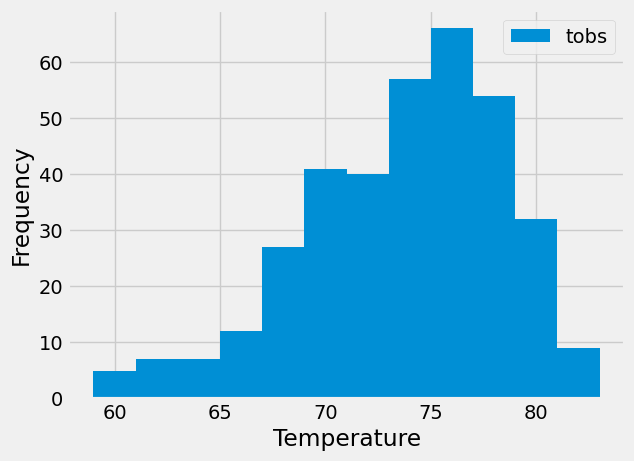

In [96]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

m_act_temp = session.query(measure.station, measure.date, measure.tobs).filter(measure.station == most_act).filter(measure.date >= m_act_date).all()

df_most_act = pd.DataFrame(m_act_temp)

x1 = df_most_act["tobs"]

plt.hist(x1, bins = 12, label ="tobs")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(loc = "best")
plt.show()

# Close Session

In [95]:
# Close Session
session.close()